# IRIS

Partie 1 : Préparation des données
Dataset : https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [1]:
import pandas as pd 

In [2]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None)
iris_df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Is there missing values ?
iris_df.isnull().sum()


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [6]:
features = iris_df.iloc[:, :-1].values
labels = iris_df.iloc[:, -1].values

In [11]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Partie 2 : Clustering avec K-means
Détermination du nombre optimal de clusters
Méthode du coude :

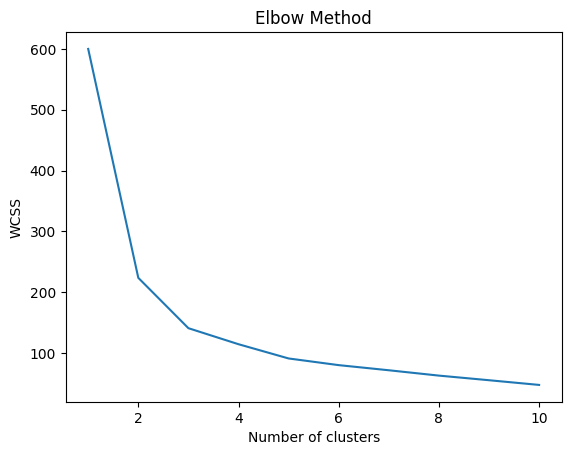

In [13]:
# determie optiomal number of cluster 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

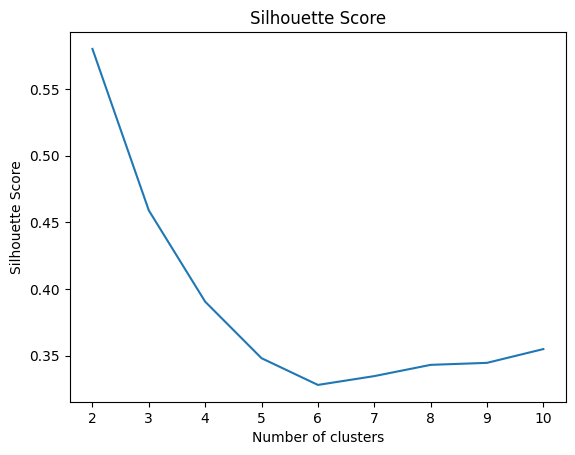

In [14]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Application de K-means
Appliquez K-means avec le k optimal choisi.

In [17]:
# fit the model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(features)

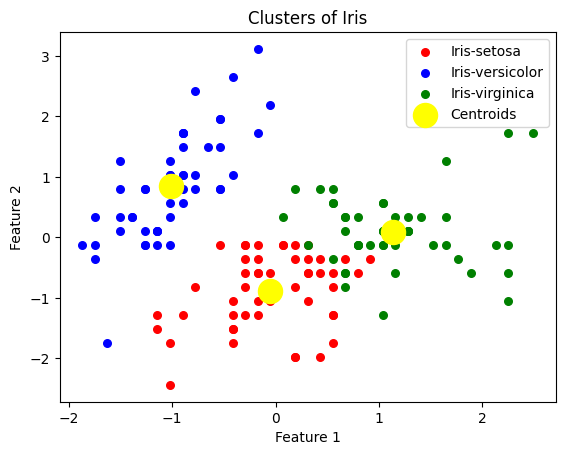

In [22]:
# visualize the clusters
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s=30, c='red', label='Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s=30, c='blue', label='Iris-versicolor')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s=30, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Partie 3 : Analyse des résultats
Interprétation des clusters

In [23]:
# Calculez les moyennes par cluster pour chaque variable.
import numpy as np
cluster_means = pd.DataFrame(features).groupby(y_kmeans).mean()
# Affichez les moyennes par cluster
cluster_means.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
print(cluster_means)

   Feature 1  Feature 2  Feature 3  Feature 4
0  -0.050220  -0.880292   0.347532   0.282063
1  -1.014579   0.842307  -1.304878  -1.255129
2   1.135970   0.096598   0.996271   1.017172


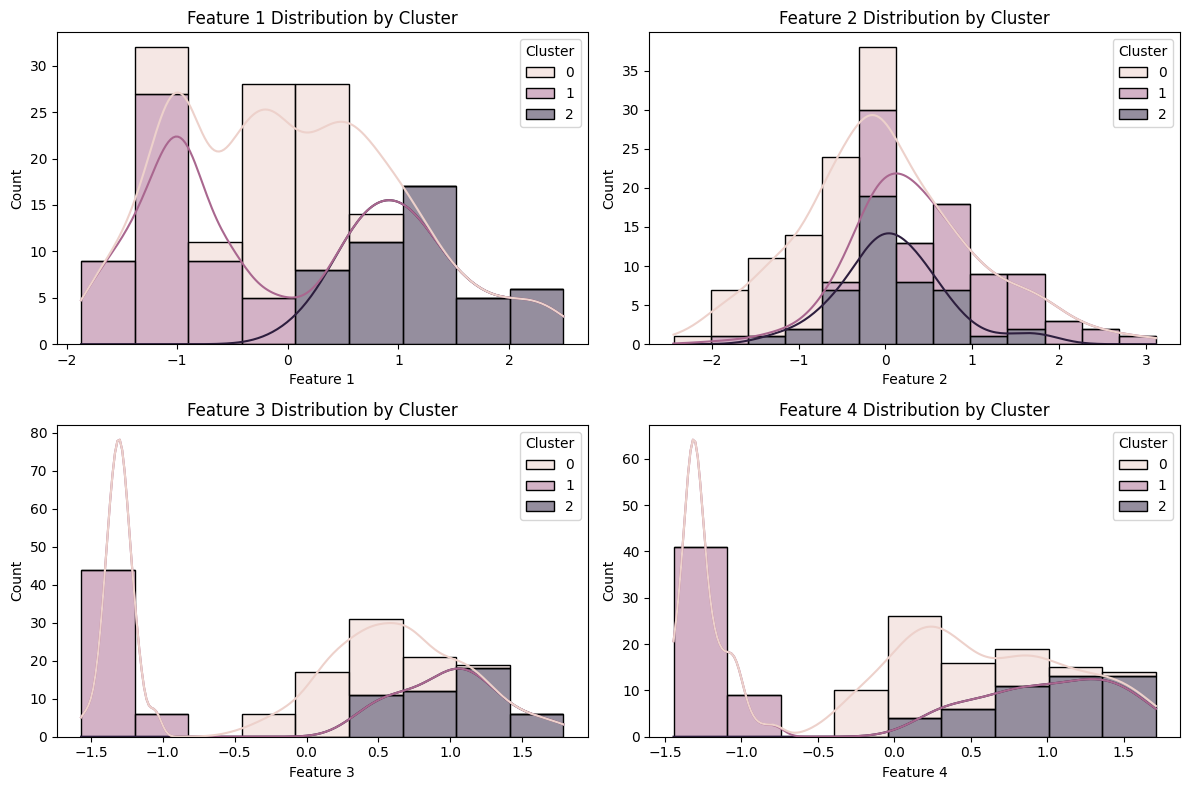

In [ ]:
# plot grouped histogram for each feature
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a DataFrame with the features and cluster labels
df = pd.DataFrame(features, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Cluster'] = y_kmeans
# Plot the grouped histogram for each feature
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=df.columns[i], hue='Cluster', multiple='stack', kde=True)
    plt.title(f'Feature {i + 1} Distribution by Cluster')
plt.tight_layout()
